In [7]:
import numpy as np
import keras
from keras.layers import Dense
from keras.optimizers import Adam
from keras.models import Sequential
import matplotlib.pyplot as plt
%matplotlib inline

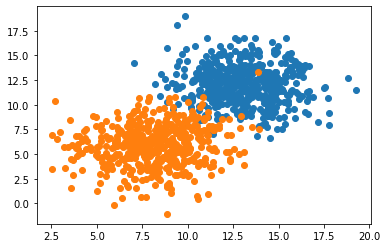

In [4]:
n_pts = 500
np.random.seed(2222)
Xa = np.array([np.random.normal(13, 2, n_pts),
               np.random.normal(12, 2, n_pts)]).T
Xb = np.array([np.random.normal(8, 2, n_pts),
               np.random.normal(6, 2, n_pts)]).T

X = np.vstack((Xa, Xb))
y = np.matrix(np.append(np.zeros(n_pts), np.ones(n_pts))).T

plt.scatter(X[:n_pts,0], X[:n_pts,1])
plt.scatter(X[n_pts:,0], X[n_pts:,1])

In [9]:
model = Sequential()
model.add(Dense(units=1, input_shape=(2, ), activation='sigmoid'))
adam = Adam(lr=0.1)
model.compile(adam, loss='binary_crossentropy', metrics=['accuracy'])
h=model.fit(x=X, y=y, verbose=1, batch_size=50, epochs=500, shuffle=True)

Epoch 1/500


/home/sheded/anaconda3/lib/python3.9/site-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


20/20 [==============================] - 1s 2ms/step - loss: 1.4668 - accuracy: 0.5320
Epoch 2/500
20/20 [==============================] - 0s 2ms/step - loss: 0.5322 - accuracy: 0.7140
Epoch 3/500
20/20 [==============================] - 0s 3ms/step - loss: 0.4234 - accuracy: 0.8180
Epoch 4/500
20/20 [==============================] - 0s 3ms/step - loss: 0.3750 - accuracy: 0.8690
Epoch 5/500
20/20 [==============================] - 0s 2ms/step - loss: 0.3367 - accuracy: 0.8980
Epoch 6/500
20/20 [==============================] - 0s 3ms/step - loss: 0.3042 - accuracy: 0.9210
Epoch 7/500
20/20 [==============================] - 0s 2ms/step - loss: 0.2765 - accuracy: 0.9340
Epoch 8/500
20/20 [==============================] - 0s 2ms/step - loss: 0.2547 - accuracy: 0.9520
Epoch 9/500
20/20 [==============================] - 0s 2ms/step - loss: 0.2328 - accuracy: 0.9460
Epoch 10/500
20/20 [==============================] - 0s 3ms/step - loss: 0.2172 - accuracy: 0.9520
Epoch 11/500
20/20 [=

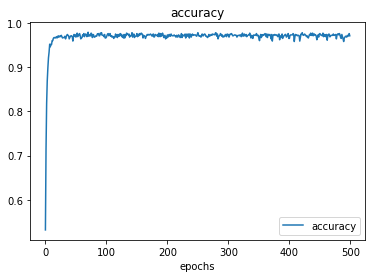

In [13]:
plt.plot(h.history['accuracy'])
plt.xlabel('epochs')
plt.title('accuracy')
plt.legend(['accuracy'])
plt.show()

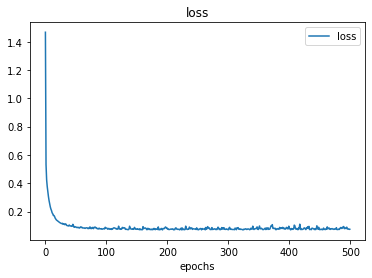

In [14]:
plt.plot(h.history['loss'])
plt.xlabel('epochs')
plt.title('loss')
plt.legend(['loss'])
plt.show()

In [51]:
def plot_decision_boundary(X, y, model):
    x_span = np.linspace(min(X[:, 0])-1, max(X[:, 0])+1)
    y_span = np.linspace(min(X[:, 1])-1, max(X[:, 1])+1)
    xx, yy = np.meshgrid(x_span, y_span)
    xx_, yy_ = xx.ravel(), yy.ravel()
    grid=np.c_[xx_, yy_]
    pred = model.predict(grid)
    z= pred.reshape(xx.shape)
    plt.contourf(xx, yy, z)

79/79 [==============================] - 0s 2ms/step


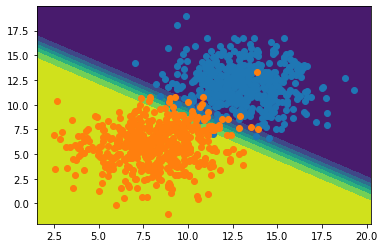

In [53]:
plot_decision_boundary(X, y, model)
plt.scatter(X[:n_pts,0], X[:n_pts,1])
plt.scatter(X[n_pts:,0], X[n_pts:,1])